# o'reillyのカサゴ深層学習の本

## ニューラルネットワークの構成要素

## [目次](TableOfContents.ipynb)
- [環境準備](#環境準備)
  - [インストール](#インストール)
  - [インポート](#インポート)
- [パーセプトロン](#パーセプトロン)
  - [パーセプトロンの概要](#パーセプトロンの概要)
  - [パーセプトロンで表現したゲート](#パーセプトロンで表現したゲート)
    - [ANDゲートの実装](#ANDゲートの実装)
    - [NANDゲートの実装](#NANDゲートの実装)
    - [ORゲートの実装](#ORゲートの実装)
    - [XORゲートの実装](#XORゲートの実装)
- [活性化関数](#活性化関数)
  - [活性化関数の概要](#活性化関数の概要)
  - [活性化関数の実装](#活性化関数の実装)
    - [中間層の活性化関数](#中間層の活性化関数)
      - [Step関数](#Step関数)
      - [Sigmoid関数](#Sigmoid関数)
      - [ReLU関数](#ReLU関数)
      - [Leaky ReLU関数](#Leaky_ReLU関数)
      - [Absolute value rectification](#Absolute_value_rectification)
    - [出力層の活性化関数](#出力層の活性化関数)
      - [恒等関数](#恒等関数)
      - [Sigmoid関数](#Sigmoid関数_)
      - [Softmax関数](#Softmax関数)

## 参考
- https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/notebooks/
- [深層学習（deep learning） - 開発基盤部会 Wiki](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%EF%BC%88deep%20learning%EF%BC%89) > [パーセプトロン](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3)

## 環境準備

### インストール

In [ ]:
!pip install numpy
!pip install matplotlib

### インポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

## パーセプトロン

### パーセプトロンの概要
パーセプトロンは
- AND, NAND, ORなどの論理回路を表現できる。
- 「重み」のパラメタ（wi, w0）の決定は人手によって行われる。
- しかし、XORは、単層パーセプトロンでは表現できない。  
単層パーセプトロンは、線形領域しか表現できないため。
- 従って、多層パーセプトロン（MLP）を用いる。  
多層パーセプトロン（MLP）は、非線形領域を表現できるため。
- NANDの組み合わせから、原理的にはコンピュータを作ることができる。

<img src="../work/single-perceptron.png" width="50%">

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3

### パーセプトロンで表現したゲート
<img src="../work/gates-perceptron.png" width="50%">

#### ANDゲートの実装

In [4]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


#### NANDゲートの実装

In [5]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


#### ORゲートの実装

In [6]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


#### XORゲートの実装
- XORは内部でNAND、OR、ANDを使って多層パーセプトロンとして実装
- 多層パーセプトロンでXORなどの非線形分類問題を解くことが可能

In [7]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## 活性化関数

### 活性化関数の概要
- 各層の出力する前に、出力結果をどの程度活性（発火）させるかを決める関数。  
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#m155734b
- 以下のような特徴を持っている。
  - 微分可能な非線形な関数  
    - 一次関数は何回合成しても一次関数（複雑にならない）。
    - 非線形関数を合成する（多層化と活性化関数で複雑化、非線形化）。
  - 0 <= 出力信号 <= 1 に収める。  
  入力信号が重要な時に１（に近い）、重要でない時０（に近い）値を返す。

### 活性化関数の実装

#### 中間層の活性化関数

##### Step関数
0, 1の信号
- 単純パーセプトロンの活性化関数はStep関数。
- ある閾値を超えたら「1」、それ以外は「0」を返す関数。

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#af597062

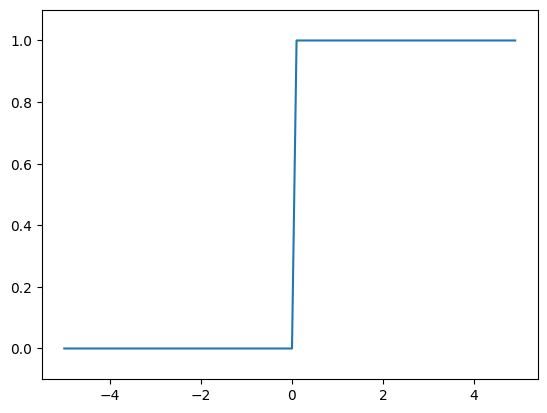

In [8]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

##### Sigmoid関数
連続的な実数の信号
- 生物の神経細胞が持つ性質をモデル化したもの。
- 微分可能で誤差逆伝播法（バックプロパゲーション）が可能だが、勾配消失問題が起こる。

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#u0ac8472

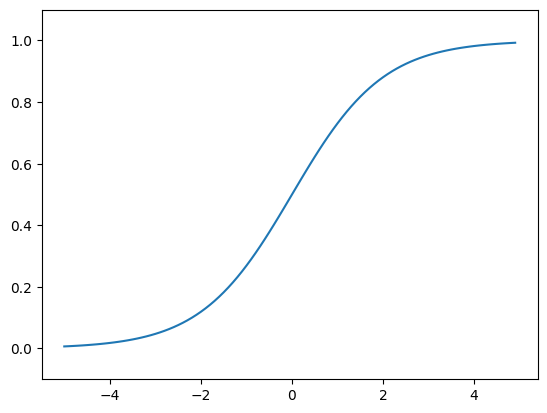

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

##### tanh関数
Sigmoid関数を変形させた関数
- tanh（Hyperbolic tangent function）関数、双曲線正接関数
- あらゆる入力値を-1.0～1.0の範囲の数値に変換して出力する関数。

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#x6c1dfdf

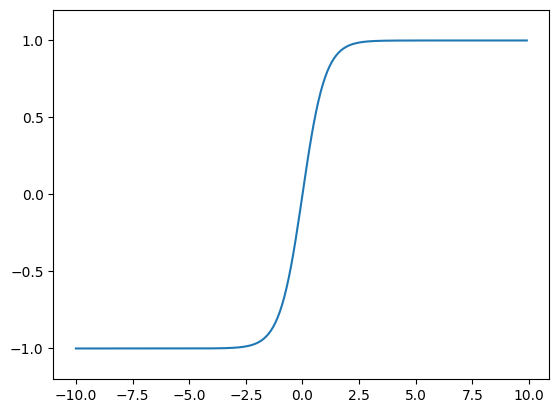

In [10]:
def tanh(x):
    return  np.tanh(x)

x = np.arange(-10.0, 10.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.2, 1.2)
plt.show()

##### ReLU関数
勾配消失問題を防ぐ関数として主流。
- 入力x が０以下なら０を出力する。
- 入力x が０を超えていれば x をそのまま出力する。

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#x80775f2

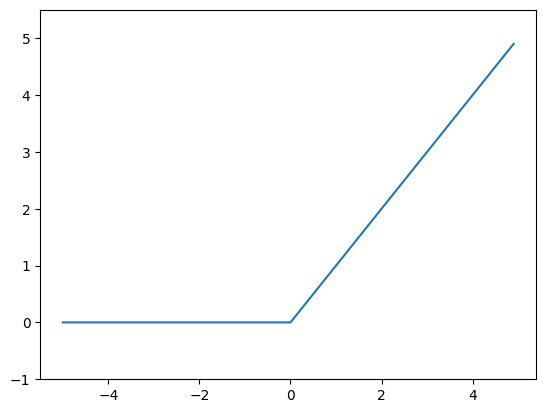

In [11]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

##### Leaky_ReLU関数
- ReLUの入力x が０以下の部分に僅かな傾斜をつけた関数
  - 入力x が０以下なら alpha * x を出力する。
  - 入力x が０を超えていれば x をそのまま出力する。
- 係数 α を
  - 学習を通して変動させるものがParametric ReLU
  - ランダムに試すものがRandomized ReLU

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF#v32e29fb

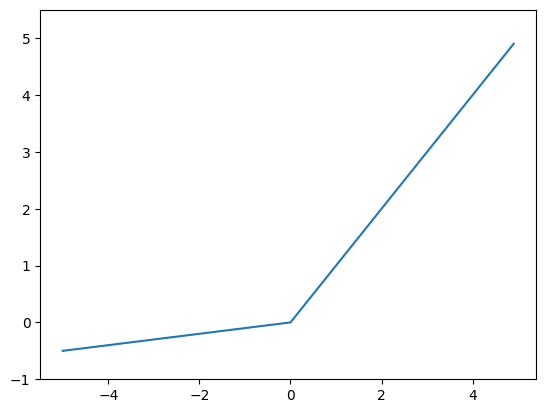

In [12]:
def leaky_relu(x, alpha=0.01):
    y = np.where(x > 0, x , alpha * x)
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x, alpha=0.1)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

##### Absolute_value_rectification
- 傾き45°の直線の絶対値を取った関数
- 主に物体認識に使用されている。

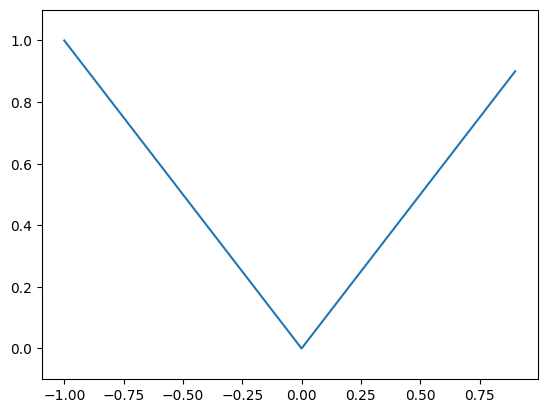

In [13]:
def abs_relu(x):
    return np.abs(x) 

X = np.arange(-1.0, 1.0, 0.1)
Y = abs_relu(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 出力層の活性化関数
出力層の活性化関数とニューロンの数は、問題に合わせて決定する。

##### 恒等関数
$$f(x) = x$$

- 回帰問題で使用する
  - 出力層は１つ。
  - 入力値をそのまま返す。
- https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%EF%BC%88%E6%8E%A8%E8%AB%96%EF%BC%89#u6563984

##### [Sigmoid関数_](#Sigmoid関数)
２値分類問題で使用する

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%EF%BC%88%E6%8E%A8%E8%AB%96%EF%BC%89#qc025e6f

##### Softmax関数
多値分類問題で使用する（[使用例](KasagoDL2.ipynb#MINSTデータの推論)
- 出力層は分類の数。
- 0-1 の実数に計算され、その総和は 1.0 になる。

https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%EF%BC%88%E6%8E%A8%E8%AB%96%EF%BC%89#b77bdfd7